# Dados desbalanceados

## Preparação dos dados

In [164]:
# Importações

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Carregando a base do censo

base_census = pd.read_csv('/content/drive/MyDrive/datasets/census.csv')
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Fazendo contagem da classe

np.unique(base_census['income'], return_counts= True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

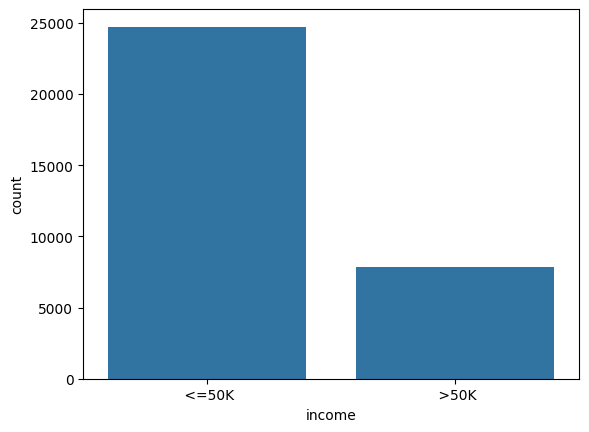

In [ ]:
# Plotando gráfico de contagem de classe

sns.countplot(x = base_census['income']);

In [ ]:
# Dividinco previsoes e classe

x_census = base_census.iloc[:, 0:14].values
y_census = base_census['income'].values

In [ ]:
# Criando as variáveis que vão transformar os dados de cada coluna, usando Label Encoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

# Transformando as colunas em string em números
x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_encoder_education.fit_transform(x_census[:,3])
x_census[:,5] = label_encoder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13])

In [ ]:
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

## Subamostragem usando Tomek Links

In [ ]:
# Importação usada para fazer o under sampling

from imblearn.under_sampling import TomekLinks

In [ ]:
tl = TomekLinks(sampling_strategy='all')
x_under, y_under = tl.fit_resample(x_census, y_census)

# 1. 'majority': Remove as amostras da classe majoritária que são "ruidosas", ou seja, que estão muito próximas de amostras da classe minoritária.
# Essa estratégia é a mais utilizada e geralmente é a que obtém os melhores resultados.

# 2. 'not minority': Remove as amostras da classe minoritária que são "ruidosas", ou seja, que estão muito próximas de amostras da classe majoritária.
# Essa estratégia é menos comum e pode ser útil em alguns casos específicos, como quando a classe minoritária é muito pequena.

# 3. 'all': Remove as amostras "ruidosas" de ambas as classes.
#  Essa estratégia é a mais agressiva e pode resultar na perda de informações importantes.

# 4. 'auto': Seleciona automaticamente a estratégia de amostragem mais adequada para o conjunto de dados.
# Essa estratégia pode ser útil para iniciantes, mas pode não ser a melhor opção em todos os casos.

In [ ]:
x_under.shape, y_under.shape

((27759, 14), (27759,))

In [ ]:
# Dados originais

np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [ ]:
# Dados removidos

np.unique(y_under, return_counts=True)
# foi removido mais ou menos 2k de registros da classe que apresenta maior quantidad de registros

(array([' <=50K', ' >50K'], dtype=object), array([22319,  5440]))

In [ ]:
# Importando as classes necessárias do sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Criando um objeto ColumnTransformer para aplicar transformações específicas às colunas dos dados
# Aqui estamos especificando que queremos aplicar a transformação de "OneHotEncoder" para as colunas 1, 3, 5, 6, 7, 8, 9 e 13 do conjunto de dados
# A transformação OneHotEncoder é utilizada para converter variáveis categóricas em vetores binários
# Por exemplo, se uma coluna tiver valores ["cachorro", "gato", "pássaro"], ela será transformada em três colunas binárias indicando a presença de cada categoria
# O parâmetro "remainder" define o que fazer com as colunas que não estão listadas explicitamente para serem transformadas
# Neste caso, 'passthrough' indica que essas colunas serão mantidas sem transformação
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

# Aplicando as transformações definidas pelo ColumnTransformer ao conjunto de dados X_under
# A função fit_transform() aplica as transformações e retorna os dados transformados
# Em seguida, chamamos o método toarray() para converter o resultado em uma matriz NumPy
x_census = onehotencorder.fit_transform(x_under).toarray()

# Retornando o conjunto de dados transformado
x_census

array([[    0.,     0.,     0., ...,  2174.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    20.],
       [    0.,     0.,     0., ..., 15024.,     0.,    40.]])

In [ ]:
# Confirmando se o tamanho das variáveis estão iguais

x_census.shape, x_under.shape

((27759, 108), (27759, 14))

In [ ]:
# Fazendo divisão entre base de treinamento e teste

from sklearn.model_selection import train_test_split
x_census_treinamento_under, x_census_teste_under, y_census_treinamento_under, y_census_teste_under = train_test_split(x_under, y_under, test_size=0.15, random_state=0)
x_census_treinamento_under.shape, x_census_teste_under.shape

((23595, 14), (4164, 14))

In [ ]:
# Fazendo o treinamento do modelo

# 84.70% com os dados originais
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_census.fit(x_census_treinamento_under, y_census_treinamento_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [ ]:
# Mostrando taxa de acurácia

from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_census.predict(x_census_teste_under)
accuracy_score(y_census_teste_under, previsoes)

0.8912103746397695

In [ ]:
# Mostrando tabela de classificação

print(classification_report(y_census_teste_under, previsoes))

              precision    recall  f1-score   support

       <=50K       0.91      0.96      0.93      3344
        >50K       0.78      0.62      0.69       820

    accuracy                           0.89      4164
   macro avg       0.85      0.79      0.81      4164
weighted avg       0.89      0.89      0.89      4164



## Sobreamostragem com SMOTE

In [ ]:
x_census.shape

(32561, 14)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_over, y_over = smote.fit_resample(x_census, y_census)

# 'minority': reamostrar apenas a classe minoritária;
# 'not minority': reamostrar todas as classes, exceto a classe minoritária;
# 'not majority': reamostrar todas as classes, exceto a classe majoritária;
# 'all': reamostrar todas as classes;
# 'auto': equivalente a 'not majority'.

In [ ]:
x_over.shape, y_over.shape

((49440, 14), (49440,))

In [ ]:
# Dados originais

np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [ ]:
# Dados com overfitting

np.unique(y_over, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720]))

In [ ]:
from sklearn.model_selection import train_test_split
X_census_treinamento_over, X_census_teste_over, y_census_treinamento_over, y_census_teste_over = train_test_split(x_over, y_over, test_size=0.15, random_state=0)
X_census_treinamento_over.shape, X_census_teste_over.shape

((42024, 14), (7416, 14))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_census.fit(X_census_treinamento_over, y_census_treinamento_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_census.predict(X_census_teste_over)
accuracy_score(y_census_teste_over, previsoes)

0.9091154261057174

In [ ]:
print(classification_report(y_census_teste_over, previsoes))

              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91      3722
        >50K       0.92      0.89      0.91      3694

    accuracy                           0.91      7416
   macro avg       0.91      0.91      0.91      7416
weighted avg       0.91      0.91      0.91      7416



# Seleção de atributos

## Preparando os dados

In [220]:
# Carregando a base do censo

base_census = pd.read_csv('/content/drive/MyDrive/datasets/census.csv')
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [221]:
# Armazenando nome das colunas na variável

colunas = base_census.columns[:-1] # quero todos os dados menos a última(:-1)
colunas

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [222]:
# Dividindo previsoes e classe

x_census = base_census.iloc[:, 0:14].values
y_census = base_census['income']

In [223]:
x_census.shape, y_census.shape

((32561, 14), (32561,))

In [224]:
# Fazendo o Label Encoder

# Criando as variáveis que vão transformar os dados de cada coluna, usando Label Encoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

# Transformando as colunas em string em números
x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_encoder_education.fit_transform(x_census[:,3])
x_census[:,5] = label_encoder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13])

In [225]:
# Fazendo a padronização

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_census_scaler = scaler.fit_transform(x_census)
x_census_scaler

array([[0.30136986, 0.875     , 0.0443019 , ..., 0.        , 0.39795918,
        0.95121951],
       [0.45205479, 0.75      , 0.0482376 , ..., 0.        , 0.12244898,
        0.95121951],
       [0.28767123, 0.5       , 0.13811345, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.56164384, 0.5       , 0.09482688, ..., 0.        , 0.39795918,
        0.95121951],
       [0.06849315, 0.5       , 0.12849934, ..., 0.        , 0.19387755,
        0.95121951],
       [0.47945205, 0.625     , 0.18720338, ..., 0.        , 0.39795918,
        0.95121951]])

## Seleção com Low Variance

In [226]:
# Verificando quantos atributos existem em cada linha

x_census.shape[1]

14

In [227]:
np.sqrt(x_census[:,0].var()), x_census_scaler[:,0].var()

(13.640223092304081, 0.034913808595952486)

In [228]:
# Pegando os valores da variância

for i in range(x_census.shape[1]):
    print(x_census_scaler[:, i].var())

0.034913808595952486
0.03312115190663569
0.005138537590667898
0.06657103564450892
0.029416385024073417
0.06301761677301636
0.09123816653931152
0.10326534394406342
0.04502805169292987
0.22136950173699113
0.00545419549240862
0.008557270623428908
0.015874043397822807
0.03641266114220053


In [229]:
# Criando objeto para seleção por variância

from sklearn.feature_selection import VarianceThreshold # import para selecionar a variância
selecao = VarianceThreshold(threshold=0.05)
# threshold = variância mínima
x_census_variancia = selecao.fit_transform(x_census_scaler)
x_census_variancia.shape

(32561, 5)

In [230]:
# Valores de variância

selecao.variances_

array([0.03491381, 0.03312115, 0.00513854, 0.06657104, 0.02941639,
       0.06301762, 0.09123817, 0.10326534, 0.04502805, 0.2213695 ,
       0.0054542 , 0.00855727, 0.01587404, 0.03641266])

In [231]:
# Verificando os números das colunas selecionadas

indices = np.where(selecao.variances_ > 0.05) # where, onde
indices

(array([3, 5, 6, 7, 9]),)

In [232]:
# Retornando o nome das colunas

colunas[indices]

Index(['education', 'marital-status', 'occupation', 'relationship', 'sex'], dtype='object')

In [233]:
# Criando uma nova base de dados onde só possui as colunas com variância maior que 0.05

base_census_variancia = base_census.drop(columns = ['age', 'workclass', 'final-weight', # nomes das colunas que não foram escolhidas
                                                    'education-num', 'race', 'capital-gain',
                                                    'capital-loos', 'hour-per-week',
                                                    'native-country'], axis = 1)
base_census_variancia.head(2)

,education,marital-status,occupation,relationship,sex,income
0,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,<=50K
1,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,<=50K


In [234]:
# Dividindo os previsores e classe

x_census_variancia = base_census_variancia.iloc[:, 0:5].values
y_census_variancia = base_census_variancia['income'].values

In [235]:
x_census_variancia.shape, y_census_variancia.shape

((32561, 5), (32561,))

In [236]:
# Fazendo o label encoder

x_census_variancia[:,0] = label_encoder_education.fit_transform(x_census_variancia[:,0])
x_census_variancia[:,1] = label_encoder_marital.fit_transform(x_census_variancia[:,1])
x_census_variancia[:,2] = label_encoder_occupation.fit_transform(x_census_variancia[:,2])
x_census_variancia[:,3] = label_encoder_relationship.fit_transform(x_census_variancia[:,3])
x_census_variancia[:,4] = label_encoder_sex.fit_transform(x_census_variancia[:,4])

In [237]:
# Fazendo o OneHotEncoder

onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0,1,2,3,4])],remainder='passthrough')
x_census_variancia = onehotencorder.fit_transform(x_census_variancia).toarray()
x_census_variancia

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [238]:
# Fazendo a padranização

scaler = MinMaxScaler()
x_census_variancia = scaler.fit_transform(x_census_variancia)
x_census_variancia

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [239]:
# Dividindo variáveis de treino e teste

x_census_treinamento_var, x_census_teste_var, y_census_treinamento_var, y_census_teste_var = train_test_split(x_census_variancia, y_census_variancia, test_size=0.15, random_state=0)
x_census_treinamento_var.shape, x_census_teste_var.shape

((27676, 46), (4885, 46))

In [240]:
# Fazendo treinamento do algoritmo

from sklearn.ensemble import RandomForestClassifier
random_forest_var = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_var.fit(x_census_treinamento_var, y_census_treinamento_var)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [241]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_var.predict(x_census_teste_var)
accuracy_score(y_census_teste_var, previsoes)

0.816171954964176

In [242]:
print(classification_report(y_census_teste_var, previsoes))

              precision    recall  f1-score   support

       <=50K       0.85      0.92      0.88      3693
        >50K       0.66      0.50      0.57      1192

    accuracy                           0.82      4885
   macro avg       0.76      0.71      0.73      4885
weighted avg       0.80      0.82      0.81      4885



## Extra tree

- Random Forest x Extra Trees Classifier: https://www.thekerneltrip.com/statistics/random-forest-vs-extra-tree/

In [265]:
x_census_scaler.shape

(32561, 14)

In [266]:
# Criando onjeto de seleção extraTreeClassfier

from sklearn.ensemble import ExtraTreesClassifier
selecao = ExtraTreesClassifier()
selecao.fit(x_census_scaler, y_census)

ExtraTreesClassifier()

In [267]:
# Armazenando o valor de importância de cada coluna

importancias = selecao.feature_importances_
print(importancias)
print()
print(importancias.sum())

[0.15464137 0.04497309 0.16475224 0.03644724 0.08836728 0.06714848
 0.07647205 0.09219811 0.01421284 0.03178003 0.08909173 0.02859842
 0.0942178  0.01709931]

1.0


In [268]:
# Pegando o números das colunas que tem a importância maior que o valor passado

indices = []
for i in range(len(importancias)):
  #print(i)
  if importancias[i] >= 0.029:
    indices.append(i)
indices

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12]

In [269]:
# Verificando o nomes das colunas escolhidas

colunas[indices]

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'hour-per-week'],
      dtype='object')

In [270]:
# Criando variável somente com as colunas escolhidas

x_census_extra = x_census[:, indices]
x_census_extra

array([[39, 7, 77516, ..., 1, 2174, 40],
       [50, 6, 83311, ..., 1, 0, 13],
       [38, 4, 215646, ..., 1, 0, 40],
       ...,
       [58, 4, 151910, ..., 0, 0, 40],
       [22, 4, 201490, ..., 1, 0, 20],
       [52, 5, 287927, ..., 0, 15024, 40]], dtype=object)

In [271]:
# Aplicando o OneHotEncoder nas colunas

onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7])],remainder='passthrough')
x_census_extra = onehotencorder.fit_transform(x_census_extra).toarray()
x_census_extra

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 2.1740e+03,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.5024e+04,
        4.0000e+01]])

In [272]:
# Dividindo entre variáveis de treino e teste

x_census_treinamento_extra, x_census_teste_extra, y_census_treinamento_extra, y_census_teste_extra = train_test_split(x_census_extra, y_census, test_size=0.15, random_state=0)
x_census_treinamento_extra.shape, x_census_teste_extra.shape

((27676, 59), (4885, 59))

In [273]:
# Fazendo o treinamento do algoritmo

random_forest_extra = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_extra.fit(x_census_treinamento_extra, y_census_treinamento_extra)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [274]:
# Fazendo previsão e mostrando a taxa de acurácia

previsoes = random_forest_extra.predict(x_census_teste_extra)
accuracy_score(y_census_teste_extra, previsoes)

0.8448311156601842